## Tip Prediction Using Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [19]:
## Load tips dataset from seaborn dataset

df = sns.load_dataset('tips')

## Quick EDA

In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [22]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [23]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [24]:
df['size'].nunique()

6

As we can see, the 'size' features is actually a discrete, not continuous. So we will change the 'size' datatypes into category.

In [25]:
## Changing 'size' data types

df['size'] = df['size'].astype('category')

In [26]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size          category
dtype: object

In [18]:
df.isna().sum()

0

We also can see that the dataset does not contain any missing value. Thus, we can proceed to feature engineering

## Create Dummy Variables for Categorical Features

In [27]:
dfOHE = df.copy()

In [28]:
dfOHE = pd.get_dummies(dfOHE, columns = ['sex', 'smoker', 'day', 'time', 'size'])

dfOHE.head()

,total_bill,tip,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,size_1,size_2,size_3,size_4,size_5,size_6
0,16.99,1.01,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0
1,10.34,1.66,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
2,21.01,3.50,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
3,23.68,3.31,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
4,24.59,3.61,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0


In [30]:
## create x and y variable

X = dfOHE.drop(columns='tip')
y = dfOHE['tip']

In [31]:
## Splitting the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15, random_state=666)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

## Error Analysis

In [47]:
## Error Analysis

Training_set = pd.concat([X_train, y_train], axis = 1)

In [53]:
## Top 10 Biggest Error on Training Set

Training_set['tip_pred'] = pred_train
Training_set['Error'] = abs(Training_set['tip'] - Training_set['tip_pred'])
Training_set.sort_values('Error', ascending=False).head(10)

,total_bill,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,size_1,size_2,size_3,size_4,size_5,size_6,tip,tip_pred,Error
170,50.81,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,10.00,5.683306,4.316694
172,7.25,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,5.15,1.776803,3.373197
212,48.33,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,9.00,5.840846,3.159154
183,23.17,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,6.50,3.616702,2.883298
214,28.17,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,6.50,3.690623,2.809377
237,32.83,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1.17,3.928225,2.758225
102,44.30,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,2.50,5.186351,2.686351
88,24.71,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,5.85,3.230401,2.619599
181,23.33,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,5.65,3.267895,2.382105
239,29.03,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,5.92,3.775326,2.144674


<Figure size 720x864 with 0 Axes>

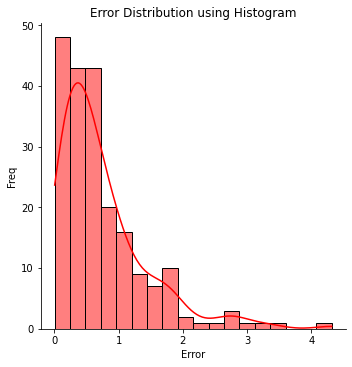

In [54]:
## Visualization of Error using Histogram

plt.figure(figsize=(10,12))
sns.displot(Training_set['Error'], kde=True,
color='red')
plt.title('Error Distribution using Histogram')
plt.ylabel('Freq')
plt.show()

## We can see that the error distribution is positively skewed.

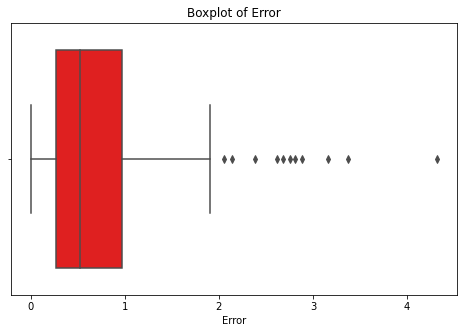

In [56]:
## Visualization of Error using boxplot

plt.figure(figsize=(8,5))
sns.boxplot(Training_set['Error'], color='red')
plt.title('Boxplot of Error')
plt.show()

## The boxplot show us that the error above 2.0, is an outlier.

Based on the distribution of Error, we expect that the model will have a low score.

## Evaluation Matrix Calculation

**Training Set**

In [57]:
pred_train = model.predict(X_train)

In [58]:
#R2 Score for Training Set

r2_train = r2_score(y_train, pred_train)
r2_train

0.4716745527582452

In [59]:
## Mean Absolute Error for Training Set

MAE_train = mean_absolute_error(y_train, pred_train)
MAE_train

0.7388465534633978

In [60]:
## Mean Squared Error for Training Set

MSE_train = mean_squared_error(y_train, pred_train)
MSE_train

1.0298235864277199

In [61]:
## Root Mean Squared Error for Training Set

RMSE_train = np.sqrt(MSE_train)
RMSE_train

1.0148022400584855

**Testing Set**

In [62]:
pred_test = model.predict(X_test)

In [63]:
## R2 for Testing Set

r2_test = r2_score(y_test, pred_test)
r2_test

0.41166609692060774

In [64]:
## Mean Absolute Error for Testing Set

MAE_test = mean_absolute_error(y_test, pred_test)
MAE_test

0.708810853225737

In [65]:
## Mean Squared Error for Testing Set

MSE_test = mean_squared_error(y_test, pred_test)
MSE_test

0.9553187999842417

In [66]:
## Root Mean Squared Error for Testing Set

RMSE_test = np.sqrt(MSE_test)
RMSE_test

0.9774041129360167

In [67]:
EvalScore = {
    'Training' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing' : [r2_test, MAE_test, MSE_test, RMSE_test]
}

Evaldf = pd.DataFrame(EvalScore, index=['R Squared', 'MAE', 'MSE', 'RMSE'])
Evaldf

,Training,Testing
R Squared,0.471675,0.411666
MAE,0.738847,0.708811
MSE,1.029824,0.955319
RMSE,1.014802,0.977404
